DOS and band structure calculations for Si in VASP shown in QuantumNerd's video https://www.youtube.com/watch?v=ohDguVFDPlc

In [1]:
using CSV, DataFrames, PyPlot

In [2]:
function getdf(file)
    DF = CSV.File(file, header=1, delim=' ', 
                        ignorerepeated=true, 
                        stripwhitespace=true) |> DataFrame;
    return DF
end;

function getlab(file)
    DF = CSV.File(file, header=1, delim=' ', 
                        ignorerepeated=true, 
                        stripwhitespace=true, 
                        ignoreemptyrows=true, 
                        footerskip=1) |> DataFrame;
    DF = dropmissing(DF[:,1:2])
    DF[!,"K-Label"] .= replace.(DF[!,"K-Label"], r"GAMMA" => "Γ")
    return DF
end;

In [3]:
tdosfile = "E:\\Documents\\QuantumNerd\\TDOS.dat";
dos = getdf(tdosfile);

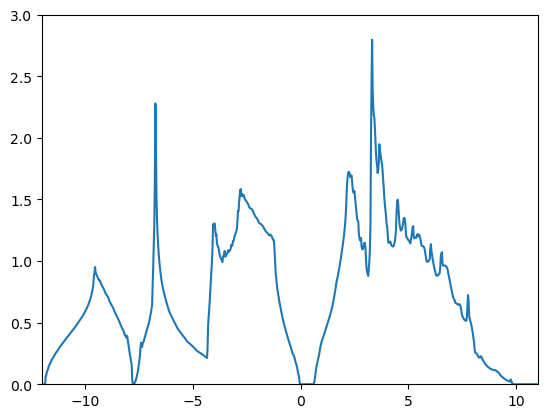

In [7]:
plot(dos[:,"#Energy"],dos[:,"TDOS"]);
xlim([-12, 11]);
ylim([0, 3]);
savefig("dos.png")

In [5]:
rbandfile = "E:\\Documents\\QuantumNerd\\REFORMATTED_BAND.dat";
klabelsfile = "E:\\Documents\\QuantumNerd\\KLABELS";
rband = getdf(rbandfile);
klabels = getlab(klabelsfile);

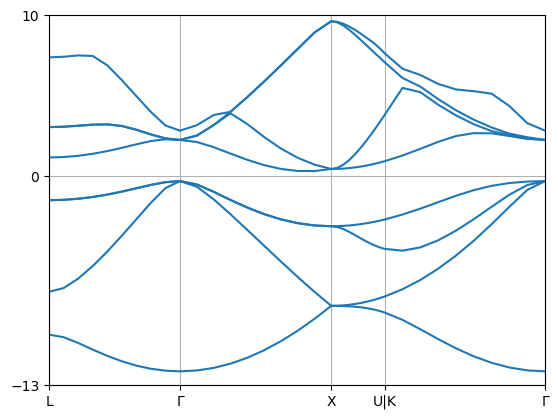

In [8]:
for i ∈ 2:ncol(rband)
    plot(rband[:,1],rband[:,i], color="tab:blue");
end
xlim([minimum(klabels[:,"Coordinate"]),maximum(klabels[:,"Coordinate"])])
ylim([-13, 10]);
yticks([-13,0,10])
xticks(klabels[:,"Coordinate"], klabels[:,"K-Label"])
grid(which="both")
savefig("band.png")